In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/mohitmotwani/Desktop/Extra-curriculars/UBC Jobs/upswing/Most-Recent-Cohorts-All-Data-Elements.csv", low_memory=False)
df['SAT_AVG1'] = df['SAT_AVG']
ret_state = df[['RET_FT4', 'STABBR']]
ret_state = ret_state.dropna()

In [3]:
print("Aggregate Retention Rate Statistics - United States")
ret_state.describe()

Aggregate Retention Rate Statistics - United States


,RET_FT4
count,2098.000000
mean,0.727493
std,0.169951
min,0.000000
25%,0.647250
50%,0.748250
75%,0.833525
max,1.000000


In [4]:
ret_state1 = ret_state.groupby('STABBR', as_index=False)['RET_FT4'].mean()

In [5]:
print("States by retention rate".center(40))
ret_state1.sort_values(by='RET_FT4')

        States by retention rate        


,STABBR,RET_FT4
11,GU,0.366350
35,NV,0.584270
38,OK,0.615524
34,NM,0.642169
47,UT,0.645110
53,WV,0.646277
1,AL,0.649206
43,SC,0.654266
28,MT,0.655373
10,GA,0.655966


Retention rate by state - Bar Chart


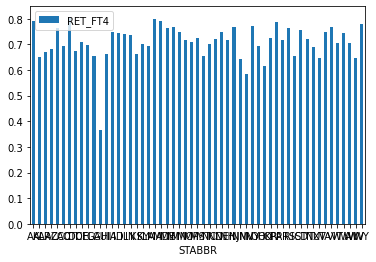

In [6]:
print("Retention rate by state - Bar Chart")
fig = ret_state1.plot.bar(x='STABBR', y='RET_FT4', rot=0)

In [7]:
ret_inst = df[['INSTNM', 'RET_FT4', 'SAT_AVG']]
ret_inst = ret_inst.dropna()
ret_inst = ret_inst[ret_inst.RET_FT4 != 0]
ret_inst = ret_inst[ret_inst.RET_FT4 != 1]

In [36]:
print('Colleges by retention rate and SAT AVG'.center(55))
pd.set_option("display.max_rows", None, "display.max_columns", None)
ret_inst.sort_values(by='RET_FT4')

         Colleges by retention rate and SAT AVG        


,INSTNM,RET_FT4,SAT_AVG
1348,Bacone College,0.1077,914.0
456,Oak Hills Christian College,0.2353,1014.0
1031,Wilberforce University,0.3932,862.0
640,Trinity College of Florida,0.4000,973.0
1130,Holy Cross College,0.4010,1270.0
983,Southwestern Christian University,0.4077,997.0
791,Randall University,0.4110,1034.0
889,Gordon State College,0.4151,951.0
1017,Brewton-Parker College,0.4157,953.0
980,Lincoln College,0.4277,809.0


In [9]:
ret_tuition_college = df[['RET_FT4', 'INSTNM', 'TUITFTE', 'UGDS', 'PFTFAC']]

In [10]:
ret_tuition_college = ret_tuition_college.dropna()

In [11]:
ret_tuition_college = ret_tuition_college[ret_tuition_college.RET_FT4 != 1]
ret_tuition_college = ret_tuition_college[ret_tuition_college.RET_FT4 != 0]

In [12]:
ret_tuition_college.sort_values('RET_FT4')

,RET_FT4,INSTNM,TUITFTE,UGDS,PFTFAC
1348,0.1077,Bacone College,8680.0,271.0,1.0000
580,0.1250,Los Angeles Pacific University,12616.0,1873.0,1.0000
642,0.1429,South University-Savannah,12661.0,362.0,0.4274
559,0.1429,South University-Tampa,11273.0,541.0,0.3306
861,0.1584,Rabbinical Seminary of America,3371.0,267.0,0.9286
...,...,...,...,...,...
2169,0.9855,University of Chicago,28828.0,6600.0,0.8323
2011,0.9872,Massachusetts Institute of Technology,31369.0,4550.0,0.9865
2179,0.9882,Stanford University,24872.0,7083.0,0.9853
2118,0.9892,Yale University,18542.0,5963.0,0.7381


In [13]:
upswing_partners = ['Albany College of Pharmacy and Health Sciences', 'Andrew College', 'Angelo State University', 'Atlanta Technical College', 'Bethune-Cookman University', 'Bishop State Community College', 'Bladen Community College', 'Borough of Manhattan Community College', 'Carl Albert State College', 'Central Carolina Community College', 'Cisco College', 'Claflin University', 'Dodge City Community College', 'Durham Technical Community College', 'Gadsden State Community College', 'Grayson College', 'Hannibal-LaGrange University', 'Harris-Stowe State University', 'Houston Community College', 'Howard College', 'Indiana University East', 'King University', 'Lamar State College - Orange', 'Limestone College', 'Lone Star College', 'Martin College', 'Mid-America Christian University', 'Midlands Technical College', 'Mitchell Community College', 
                   'Navarro College', 'North Carolina A&T State University', 'North Carolina Central University', 'NCVPS', 'North Central Texas College', 'Oklahoma State University - Oklahoma City', 'Pfeiffer University', 'Qannection', 'Richmond Community College', 'Rock Valley College', 'Samuel Merritt University', 'Savannah Technical College', 'Schenectady Community College', 'Southeastern Community College', 'Southern Arkansas University Tech',
                    'Southwest Oklahoma State University', 'Spartanburg Methodist College', 'Texas College', 'University of Houston-Victoria', 'University of Memphis', 'Vance-Granville Community College', 'Wallace State Community College', 'West Georgia Technical College', 'Western Texas College', 'Winston-Salem State University']

In [63]:
upswing_clients = ret_inst[ret_inst['INSTNM'].isin(upswing_partners)]
print("Summary statistics for retention rate amongst relevant upswing partners")
upswing_clients['RET_FT4'].describe()

Summary statistics for retention rate amongst relevant upswing partners


count    10.000000
mean      0.690510
std       0.113271
min       0.500000
25%       0.641525
50%       0.712800
75%       0.769050
max       0.822800
Name: RET_FT4, dtype: float64

In [62]:
print("Summary statistics for SAT averages amongst relevant upswing partners")
upswing_clients['SAT_AVG'].describe()

Summary statistics for SAT averages amongst relevant upswing partners


count      10.000000
mean     1042.300000
std        90.022281
min       925.000000
25%       984.000000
50%      1029.000000
75%      1084.250000
max      1228.000000
Name: SAT_AVG, dtype: float64

In [14]:
ca = df[['RET_FT4', 'TUITFTE']]

In [15]:
ca = ca.dropna()

In [16]:
ca = ca[ca.RET_FT4 != 1]
ca = ca[ca.RET_FT4 != 0]

In [17]:
kmeans = KMeans(n_clusters=4).fit(ca)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90698820e-01 6.04420649e+03]
 [7.72407933e-01 1.98794591e+04]
 [6.98293207e-01 1.26240584e+04]
 [8.54575904e-01 3.10896747e+04]]


Cluster Analysis of Institutions By Net Tuition Revenues and Retention Rate


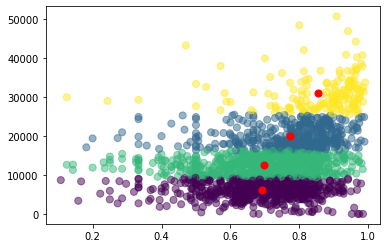

In [18]:
print("Cluster Analysis of Institutions By Net Tuition Revenues and Retention Rate")
plt.scatter(ca['RET_FT4'], ca['TUITFTE'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

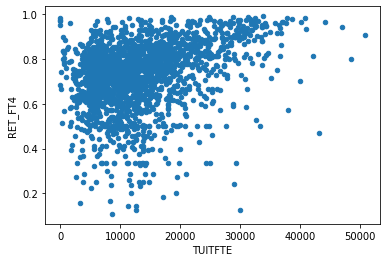

In [34]:
fig1 = ca.plot.scatter(x='TUITFTE', y='RET_FT4', rot=0)

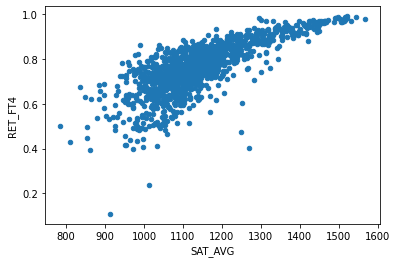

In [20]:
fig2 = ret_inst.plot.scatter(x='SAT_AVG', y='RET_FT4', rot=0)

In [21]:
print("Correlation between retention rates and SAT Averages")
ret_inst['SAT_AVG'].corr(ret_inst['RET_FT4'])

Correlation between retention rates and SAT Averages


0.7737488041474658

In [30]:
sat_avg1 = df['SAT_AVG']
sat_avg1.dropna()
df['SAT_AVG1'] = sat_avg1
ca1 = df[['RET_FT4', 'SAT_AVG1']]
ca1 = ca1.dropna()
ca1 = ca1[ca1.RET_FT4 != 1]
ca1 = ca1[ca1.RET_FT4 != 0]

In [31]:
kmeans1 = KMeans(n_clusters=4).fit(ca1)
centroids1 = kmeans1.cluster_centers_
print(centroids1)

[[7.48020258e-01 1.11800737e+03]
 [9.41939316e-01 1.41521368e+03]
 [6.54527134e-01 1.00875000e+03]
 [8.36976512e-01 1.23506762e+03]]


Cluster Analysis of Institutions By Average SAT Scores and Retention Rate


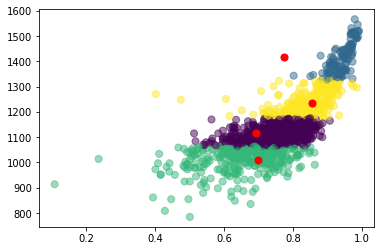

In [32]:
print("Cluster Analysis of Institutions By Average SAT Scores and Retention Rate")
plt.scatter(ca1['RET_FT4'], ca1['SAT_AVG1'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids1[:, 1], c='red', s=50)
plt.show()